In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
oil_prod_df = pd.read_csv("./datasets/oil-production-by-country.csv")
prices_df = pd.read_csv("./datasets/gasoline-prices-by-country.csv")
prices_df = prices_df.rename(columns={"year":"Year"})
oil_prod_df = oil_prod_df.rename(columns={"Entity":"Country Name"})
oil_prod_df = oil_prod_df.drop(columns=["Code"])

#oil_prod_df.set_index("Country Name").loc[""]
#prices_df

In [3]:
# inner merge on two dataframes
comb_df = pd.merge(prices_df, oil_prod_df, how="inner", on=["Country Name", "Year"])
comb_df

,Country Name,Year,gas prices,filtered gas prices,Oil production (TWh)
0,Albania,1991,NaN,NaN,12.826
1,Albania,1992,NaN,NaN,7.446
2,Albania,1993,NaN,NaN,7.426
3,Albania,1994,NaN,NaN,7.426
4,Albania,1995,NaN,NaN,6.751
...,...,...,...,...,...
2856,Zimbabwe,2012,1.52,1.52,0.000
2857,Zimbabwe,2013,NaN,1.54,0.000
2858,Zimbabwe,2014,1.56,1.56,0.000
2859,Zimbabwe,2015,NaN,1.45,0.000


In [4]:
# want to look at years 2000 and 2010 for relationship between oil production and prices paid at pump
yr_2000_df = comb_df[comb_df["Year"] == 2000].set_index("Country Name")
yr_2010_df = comb_df[comb_df["Year"] == 2010].set_index("Country Name")

# check what countries are missing from 2000 df (only kosovo montenegro and Chad)
#check_missing = yr_2010_df[~yr_2010_df["Country Name"].isin(yr_2000_df["Country Name"])]
#check_missing

yr_2000_df = yr_2000_df.drop("World")
yr_2010_df = yr_2010_df.drop("World")

yr_2000_df_gt_100 = yr_2000_df[yr_2000_df["Oil production (TWh)"] > 100]
yr_2010_df_gt_100 = yr_2010_df[yr_2010_df["Oil production (TWh)"] > 100]
#yr_2010_df[yr_2010_df["Oil production (TWh)"] == yr_2010_df["Oil production (TWh)"].max()]
#yr_2000_df[yr_2000_df["Oil production (TWh)"] == yr_2000_df["Oil production (TWh)"].max()]

yr_2000_df
#yr_2010_df

,Year,gas prices,filtered gas prices,Oil production (TWh)
Country Name,,,,
Albania,2000,0.57,0.570,3.829
Algeria,2000,0.27,0.270,776.733
Angola,2000,0.30,0.300,428.566
Argentina,2000,1.07,1.070,480.871
Armenia,2000,0.55,0.550,0.000
...,...,...,...,...
Uruguay,2000,1.19,1.190,0.000
Uzbekistan,2000,0.14,0.140,87.225
Vietnam,2000,0.38,0.380,192.453


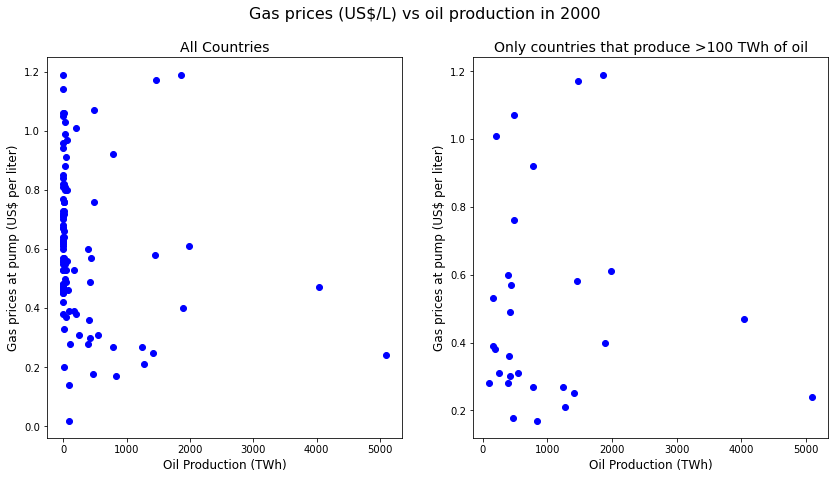

In [5]:
plt.figure(figsize=(14,7)).suptitle("Gas prices (US$/L) vs oil production in 2000", fontsize=16)
plt.subplot(1,2,1)
plt.xlabel("Oil Production (TWh)", fontsize=12)
plt.ylabel("Gas prices at pump (US$ per liter)", fontsize=12)
plt.title("All Countries", fontsize=14)
plt.plot(yr_2000_df['Oil production (TWh)'], yr_2000_df["filtered gas prices"], 'bo')
#plt.legend(["United States", "Canada", "Germany", "Crude price"], loc="upper left")
plt.subplot(1,2,2)
plt.xlabel("Oil Production (TWh)", fontsize=12)
plt.ylabel("Gas prices at pump (US$ per liter)", fontsize=12)
plt.title("Only countries that produce >100 TWh of oil", fontsize=14)
plt.plot(yr_2000_df_gt_100['Oil production (TWh)'], yr_2000_df_gt_100["filtered gas prices"], 'bo')
plt.savefig("gas-price-vs-oil-prod-2000.png")
plt.show()

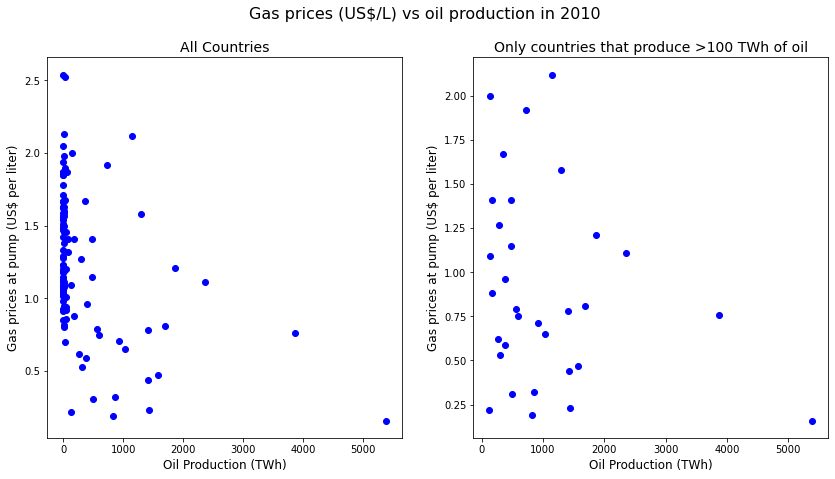

In [6]:
plt.figure(figsize=(14,7)).suptitle("Gas prices (US$/L) vs oil production in 2010", fontsize=16)
plt.subplot(1,2,1)
plt.xlabel("Oil Production (TWh)", fontsize=12)
plt.ylabel("Gas prices at pump (US$ per liter)", fontsize=12)
plt.title("All Countries", fontsize=14)
plt.plot(yr_2010_df['Oil production (TWh)'], yr_2010_df["filtered gas prices"], 'bo')
#plt.legend(["United States", "Canada", "Germany", "Crude price"], loc="upper left")
plt.subplot(1,2,2)
plt.xlabel("Oil Production (TWh)", fontsize=12)
plt.ylabel("Gas prices at pump (US$ per liter)", fontsize=12)
plt.title("Only countries that produce >100 TWh of oil", fontsize=14)
plt.plot(yr_2010_df_gt_100['Oil production (TWh)'], yr_2010_df_gt_100["filtered gas prices"], 'bo')
plt.savefig("gas-price-vs-oil-prod-2010.png")
plt.show()